In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import joblib
import pickle as pkl

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


***Load Data***

In [ ]:
import pandas as pd
path=('/content/heart attack in youngster.csv')
data=pd.read_csv(path)

***EDA(Exploratory Data Analysis)***

In [ ]:
data.head()

,Age,Gender,Region,Urban/Rural,SES,Smoking Status,Alcohol Consumption,Diet Type,Physical Activity Level,Screen Time (hrs/day),...,Stress Level,Blood Pressure (systolic/diastolic mmHg),Resting Heart Rate (bpm),ECG Results,Chest Pain Type,Maximum Heart Rate Achieved,Exercise Induced Angina,Blood Oxygen Levels (SpO2%),Triglyceride Levels (mg/dL),Heart Attack Likelihood
0,NaN,Male,East,Urban,Middle,Never,Regularly,Non-Vegetarian,Sedentary,NaN,...,High,177.0/63.1,NaN,Normal,Non-anginal,NaN,No,NaN,NaN,0
1,24.0,Female,East,Urban,Low,Occasionally,Occasionally,Non-Vegetarian,Sedentary,15.0,...,High,137.5/110.7,76.0,Normal,Non-anginal,118.0,No,97.1,341.0,0
2,24.0,Female,North,Urban,Low,Occasionally,Occasionally,Vegan,High,15.0,...,Low,138.3/76.6,86.0,Normal,Typical,164.0,No,92.7,373.0,1
3,NaN,Male,East,Urban,Middle,Occasionally,Never,Vegetarian,Sedentary,NaN,...,Medium,177.1/90.0,NaN,Normal,Non-anginal,NaN,No,NaN,NaN,1
4,21.0,Female,West,Rural,Low,Occasionally,Occasionally,Vegetarian,Moderate,4.0,...,Low,130.7/108.8,73.0,Normal,Atypical,216.0,No,94.9,235.0,0


In [ ]:
data.tail()

,Age,Gender,Region,Urban/Rural,SES,Smoking Status,Alcohol Consumption,Diet Type,Physical Activity Level,Screen Time (hrs/day),...,Stress Level,Blood Pressure (systolic/diastolic mmHg),Resting Heart Rate (bpm),ECG Results,Chest Pain Type,Maximum Heart Rate Achieved,Exercise Induced Angina,Blood Oxygen Levels (SpO2%),Triglyceride Levels (mg/dL),Heart Attack Likelihood
9995,33.0,Female,East,Rural,Low,Occasionally,Occasionally,Vegan,Sedentary,2.0,...,Low,127.6/64.8,88.0,Abnormal,Atypical,147.0,No,90.8,296.0,0
9996,35.0,Female,North-East,Rural,Low,Occasionally,Never,Vegan,High,14.0,...,Low,162.5/77.4,116.0,Normal,Atypical,136.0,No,95.7,254.0,0
9997,32.0,Male,West,Urban,Middle,Regularly,Never,Non-Vegetarian,Moderate,1.0,...,High,120.8/81.3,62.0,Normal,Typical,171.0,No,98.6,319.0,0
9998,21.0,Female,Central,Rural,Middle,Regularly,Never,Vegan,Sedentary,9.0,...,Medium,110.0/100.3,84.0,Abnormal,Non-anginal,137.0,No,91.5,317.0,0
9999,28.0,Male,North,Rural,High,Never,Never,Vegetarian,Sedentary,5.0,...,High,166.0/83.5,77.0,Normal,Asymptomatic,220.0,No,97.4,80.0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Age                                       9000 non-null   float64
 1   Gender                                    10000 non-null  object 
 2   Region                                    10000 non-null  object 
 3   Urban/Rural                               10000 non-null  object 
 4   SES                                       10000 non-null  object 
 5   Smoking Status                            10000 non-null  object 
 6   Alcohol Consumption                       10000 non-null  object 
 7   Diet Type                                 10000 non-null  object 
 8   Physical Activity Level                   10000 non-null  object 
 9   Screen Time (hrs/day)                     9000 non-null   float64
 10  Sleep Duration (hrs/day)           

In [ ]:
data.describe()

,Age,Screen Time (hrs/day),Sleep Duration (hrs/day),Cholesterol Levels (mg/dL),BMI (kg/m²),Resting Heart Rate (bpm),Maximum Heart Rate Achieved,Blood Oxygen Levels (SpO2%),Triglyceride Levels (mg/dL),Heart Attack Likelihood
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,10000.000000
mean,26.609667,7.518000,6.493222,199.952889,27.406944,89.528000,159.736111,94.937522,274.498556,0.203800
std,5.151335,4.628301,2.292569,57.569020,7.215852,17.320376,35.063862,2.887124,128.801122,0.402842
min,18.000000,0.000000,3.000000,100.000000,15.000000,60.000000,100.000000,90.000000,50.000000,0.000000
25%,22.000000,4.000000,4.000000,150.000000,21.100000,74.000000,129.000000,92.400000,164.000000,0.000000
50%,27.000000,8.000000,6.000000,200.000000,27.500000,90.000000,160.000000,94.900000,275.000000,0.000000
75%,31.000000,12.000000,8.000000,250.000000,33.600000,104.000000,190.000000,97.400000,385.000000,0.000000
max,35.000000,15.000000,10.000000,300.000000,40.000000,119.000000,220.000000,100.000000,500.000000,1.000000


In [ ]:
print("\nDataset shape (rows, columns):")
print(data.shape)


Dataset shape (rows, columns):
(10000, 26)


In [ ]:
print("\nColumn names:")
print(data.columns)


Column names:
Index(['Age', 'Gender', 'Region', 'Urban/Rural', 'SES', 'Smoking Status',
       'Alcohol Consumption', 'Diet Type', 'Physical Activity Level',
       'Screen Time (hrs/day)', 'Sleep Duration (hrs/day)',
       'Family History of Heart Disease', 'Diabetes', 'Hypertension',
       'Cholesterol Levels (mg/dL)', 'BMI (kg/m²)', 'Stress Level',
       'Blood Pressure (systolic/diastolic mmHg)', 'Resting Heart Rate (bpm)',
       'ECG Results', 'Chest Pain Type', 'Maximum Heart Rate Achieved',
       'Exercise Induced Angina', 'Blood Oxygen Levels (SpO2%)',
       'Triglyceride Levels (mg/dL)', 'Heart Attack Likelihood'],
      dtype='object')


In [ ]:
print("\nMissing values in each column:")
print(data.isnull().sum())


Missing values in each column:
Age                                         1000
Gender                                         0
Region                                         0
Urban/Rural                                    0
SES                                            0
Smoking Status                                 0
Alcohol Consumption                            0
Diet Type                                      0
Physical Activity Level                        0
Screen Time (hrs/day)                       1000
Sleep Duration (hrs/day)                    1000
Family History of Heart Disease                0
Diabetes                                       0
Hypertension                                   0
Cholesterol Levels (mg/dL)                  1000
BMI (kg/m²)                                 1000
Stress Level                                   0
Blood Pressure (systolic/diastolic mmHg)       0
Resting Heart Rate (bpm)                    1000
ECG Results                          

In [ ]:
print("\nSummary statistics for categorical columns:")
print(data.describe(include=[object]))


Summary statistics for categorical columns:
       Gender   Region Urban/Rural    SES Smoking Status Alcohol Consumption  \
count   10000    10000       10000  10000          10000               10000   
unique      3        6           2      3              3                   3   
top      Male  Central       Urban    Low          Never               Never   
freq     4913     1746        5918   4019           5013                6006   

             Diet Type Physical Activity Level  \
count            10000                   10000   
unique               3                       3   
top     Non-Vegetarian               Sedentary   
freq              4943                    4954   

       Family History of Heart Disease Diabetes Hypertension Stress Level  \
count                            10000    10000        10000        10000   
unique                               2        2            2            3   
top                                 No       No           No       Mediu

In [ ]:
print("\nNumber of duplicate rows:")
print(data.duplicated().sum())


Number of duplicate rows:
0


***Data Visualization***

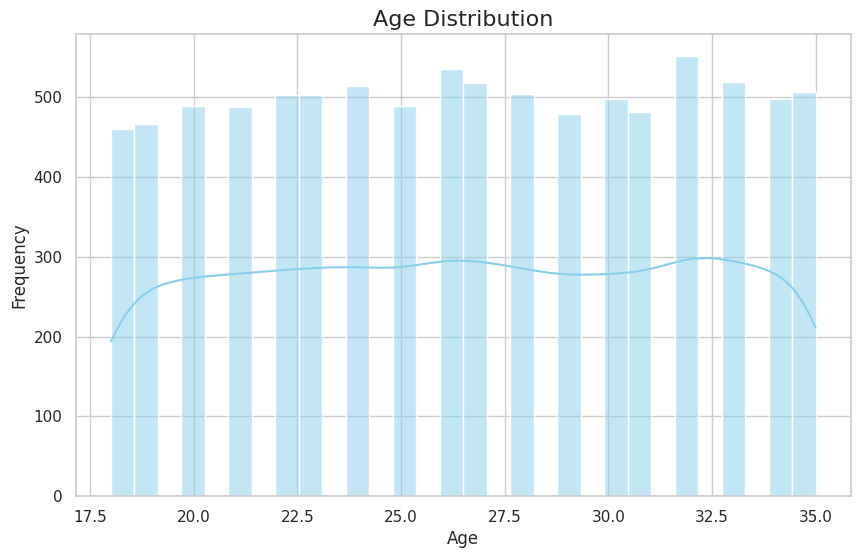

In [ ]:
# 1. Distribution of Age
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.histplot(data['Age'], kde=True, bins=30, color="skyblue")
plt.title("Age Distribution", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

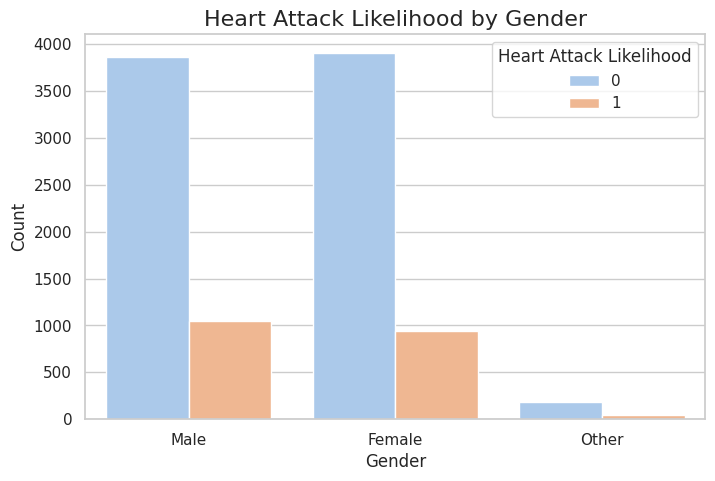

In [ ]:
# 2. Heart Attack Likelihood by Gender
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
sns.countplot(data=data, x="Gender", hue="Heart Attack Likelihood", palette="pastel")
plt.title("Heart Attack Likelihood by Gender", fontsize=16)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

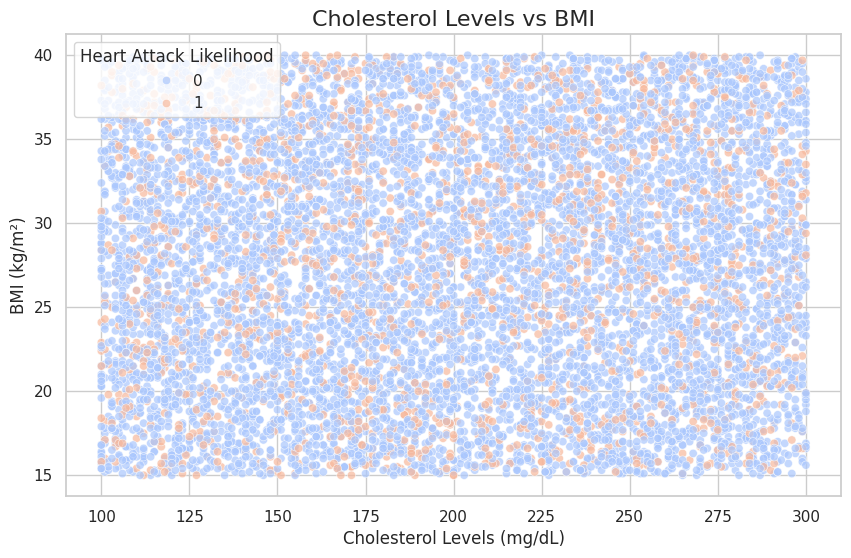

In [ ]:
# 3. Cholesterol Levels vs BMI (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data,
    x="Cholesterol Levels (mg/dL)",
    y="BMI (kg/m²)",
    hue="Heart Attack Likelihood",
    palette="coolwarm",
    alpha=0.7
)
plt.title("Cholesterol Levels vs BMI", fontsize=16)
plt.xlabel("Cholesterol Levels (mg/dL)", fontsize=12)
plt.ylabel("BMI (kg/m²)", fontsize=12)
plt.legend(title="Heart Attack Likelihood")
plt.show()

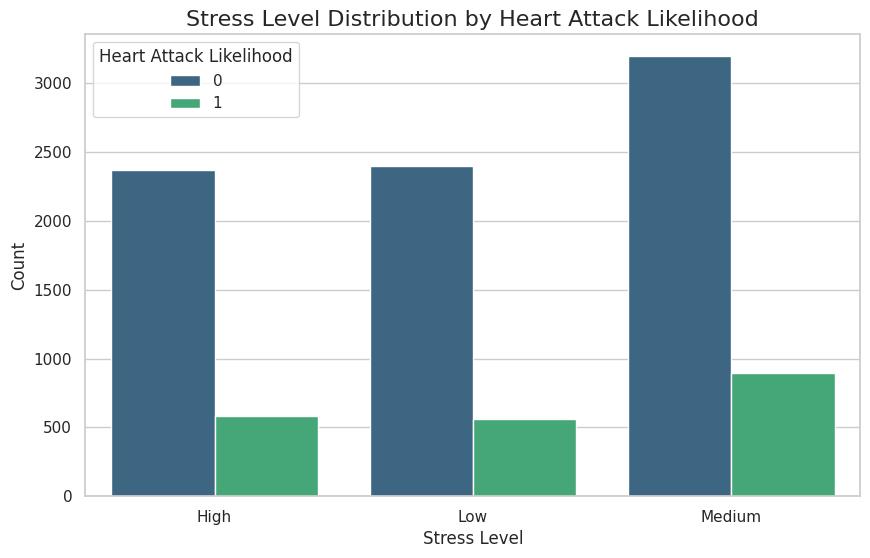

In [ ]:
# 3. Stress Level Distribution by Heart Attack Likelihood
plt.figure(figsize=(10, 6))
sns.countplot(
    data=data,
    x="Stress Level",
    hue="Heart Attack Likelihood",
    palette="viridis"
)
plt.title("Stress Level Distribution by Heart Attack Likelihood", fontsize=16)
plt.xlabel("Stress Level", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()


<ipython-input-22-c2d403eb2db1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


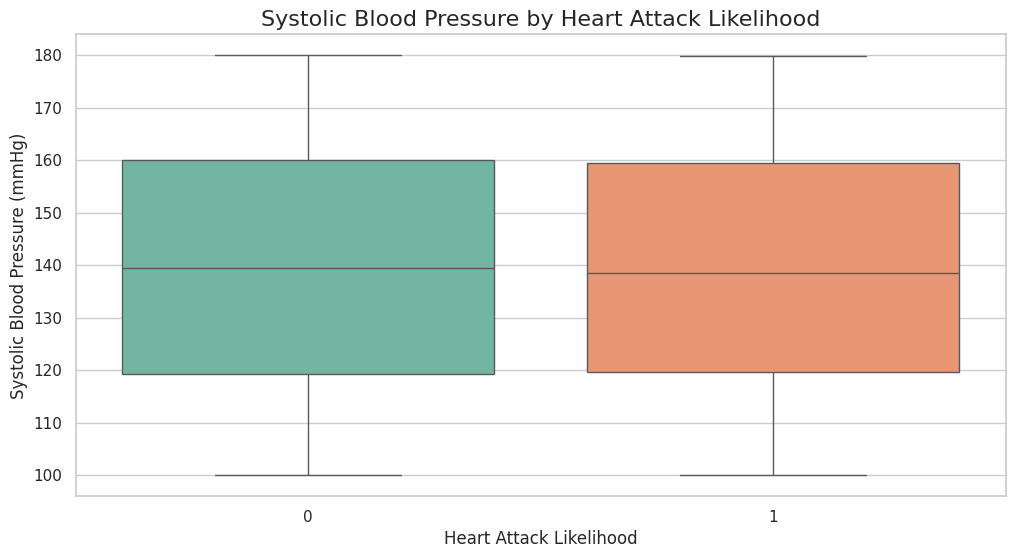

In [ ]:
# 4. Blood Pressure Boxplot
plt.figure(figsize=(12, 6))
data['Systolic_BP'] = data['Blood Pressure (systolic/diastolic mmHg)'].str.split('/').str[0].astype(float)
sns.boxplot(
    data=data,
    x="Heart Attack Likelihood",
    y="Systolic_BP",
    palette="Set2"
)
plt.title("Systolic Blood Pressure by Heart Attack Likelihood", fontsize=16)
plt.xlabel("Heart Attack Likelihood", fontsize=12)
plt.ylabel("Systolic Blood Pressure (mmHg)", fontsize=12)
plt.show()


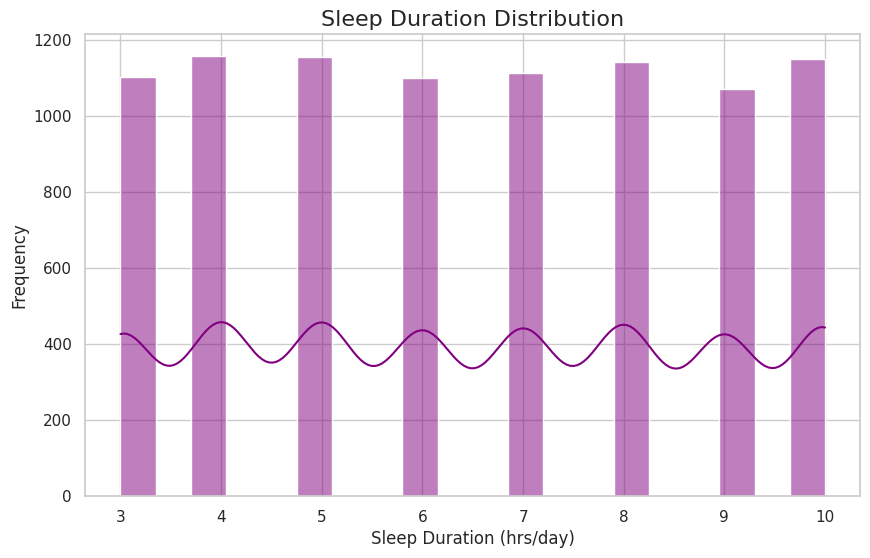

In [ ]:
# 5. Sleep Duration Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Sleep Duration (hrs/day)'], kde=True, bins=20, color="purple")
plt.title("Sleep Duration Distribution", fontsize=16)
plt.xlabel("Sleep Duration (hrs/day)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

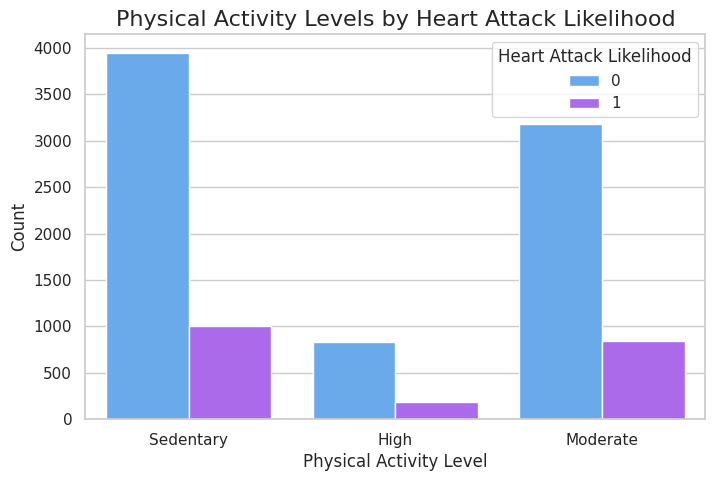

In [ ]:
# 6. Physical Activity Levels
plt.figure(figsize=(8, 5))
sns.countplot(
    data=data,
    x="Physical Activity Level",
    hue="Heart Attack Likelihood",
    palette="cool"
)
plt.title("Physical Activity Levels by Heart Attack Likelihood", fontsize=16)
plt.xlabel("Physical Activity Level", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

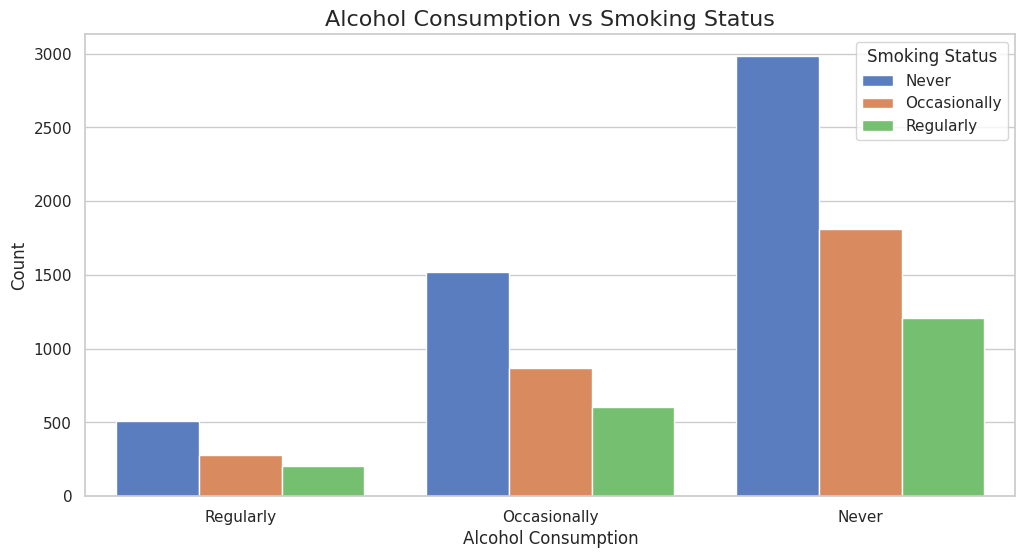

In [ ]:
# 7. Alcohol Consumption vs Smoking Status
plt.figure(figsize=(12, 6))
sns.countplot(
    data=data,
    x="Alcohol Consumption",
    hue="Smoking Status",
    palette="muted"
)
plt.title("Alcohol Consumption vs Smoking Status", fontsize=16)
plt.xlabel("Alcohol Consumption", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

<ipython-input-26-87e7306b6838>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


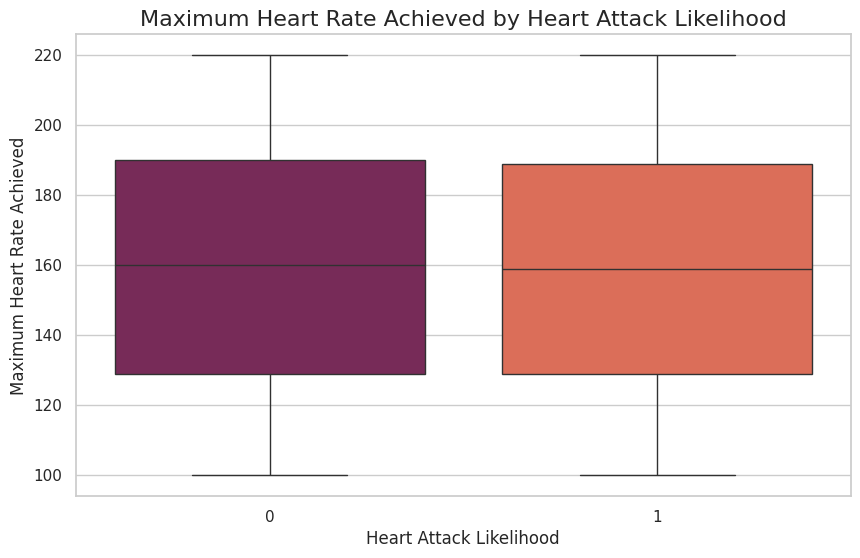

In [ ]:
# 8. Maximum Heart Rate Achieved
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data,
    x="Heart Attack Likelihood",
    y="Maximum Heart Rate Achieved",
    palette="rocket"
)
plt.title("Maximum Heart Rate Achieved by Heart Attack Likelihood", fontsize=16)
plt.xlabel("Heart Attack Likelihood", fontsize=12)
plt.ylabel("Maximum Heart Rate Achieved", fontsize=12)
plt.show()

<ipython-input-27-ba96eae3d0da>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


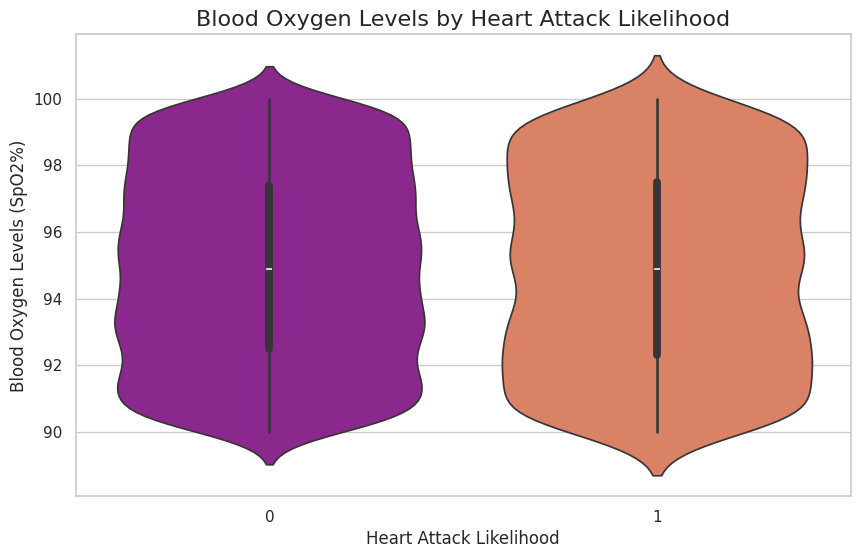

In [ ]:
# 9. Blood Oxygen Levels (SpO2%)
plt.figure(figsize=(10, 6))
sns.violinplot(
    data=data,
    x="Heart Attack Likelihood",
    y="Blood Oxygen Levels (SpO2%)",
    palette="plasma"
)
plt.title("Blood Oxygen Levels by Heart Attack Likelihood", fontsize=16)
plt.xlabel("Heart Attack Likelihood", fontsize=12)
plt.ylabel("Blood Oxygen Levels (SpO2%)", fontsize=12)
plt.show()

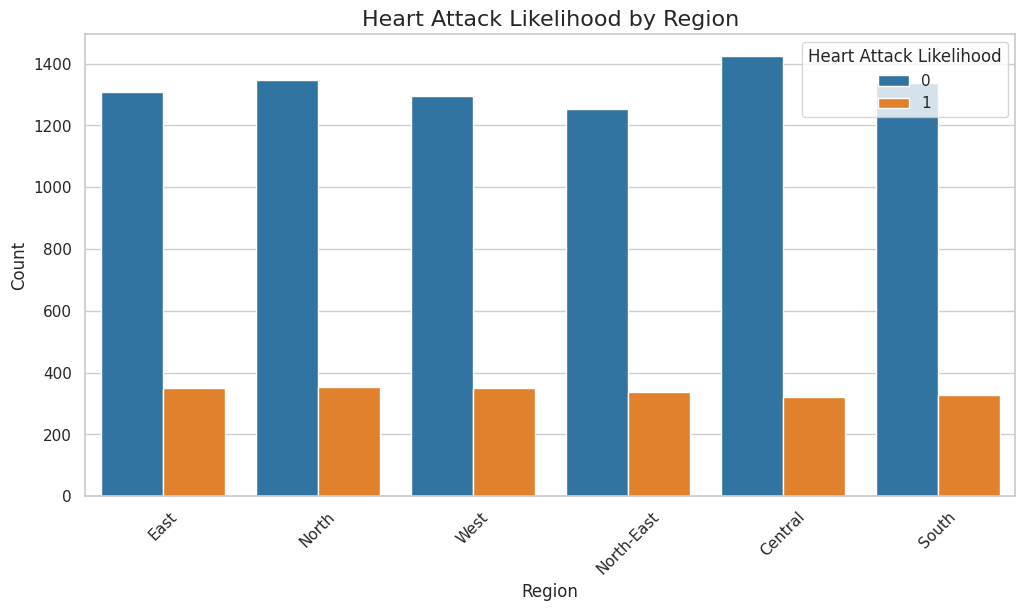

In [ ]:
# 10. Heart Attack Likelihood by Region
plt.figure(figsize=(12, 6))
sns.countplot(
    data=data,
    x="Region",
    hue="Heart Attack Likelihood",
    palette="tab10"
)
plt.title("Heart Attack Likelihood by Region", fontsize=16)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()

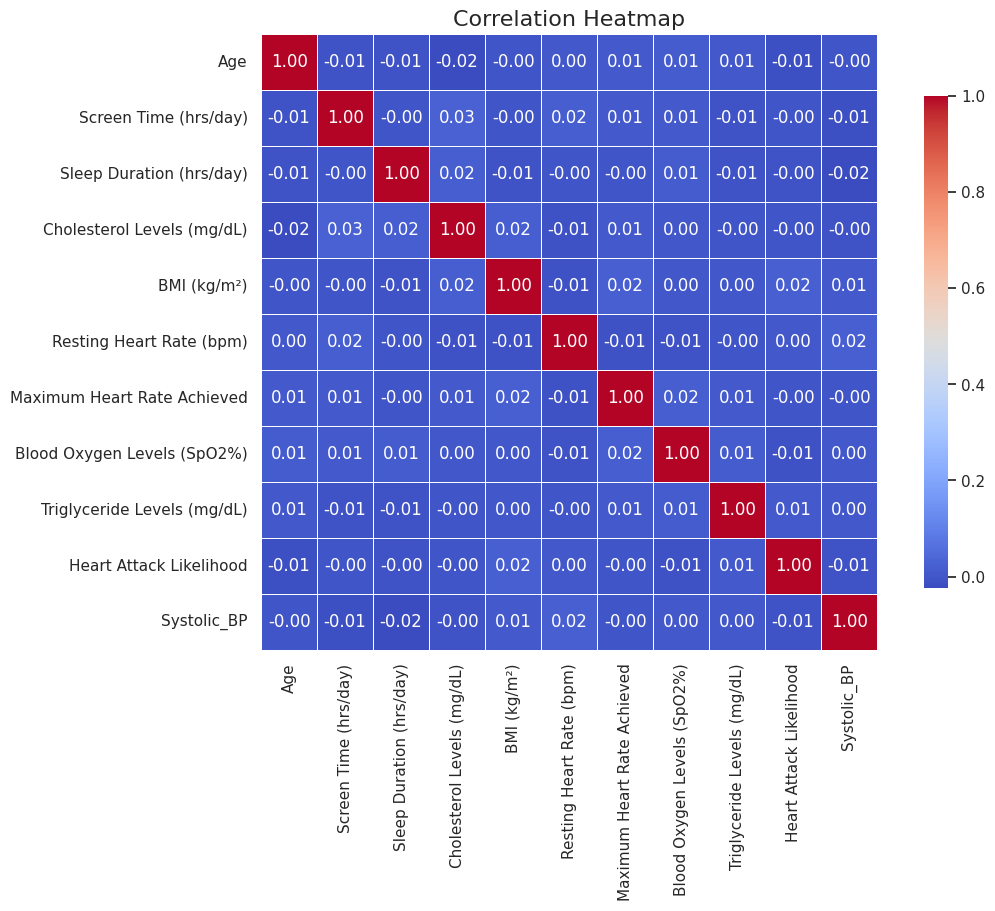

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical features for correlation analysis
numerical_data = data.select_dtypes(include=['number'])

# Generate a correlation matrix for numerical features
correlation_matrix = numerical_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,            # Annotate the cells with correlation values
    fmt=".2f",             # Format the correlation values to two decimal places
    cmap="coolwarm",       # Color map for the heatmap
    square=True,           # Keep the heatmap cells square-shaped
    linewidths=0.5,        # Add space between cells
    cbar_kws={"shrink": 0.8}  # Adjust the size of the color bar
)

# Add titles and labels
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

***Data Preprocessing***

*1)Handling missing values*

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Identify columns with missing values
missing_columns = [col for col in data.columns if data[col].isnull().any()]

# Impute numerical columns with their mean
numerical_imputer = SimpleImputer(strategy='mean')
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols] = numerical_imputer.fit_transform(data[numerical_cols])

# Impute categorical columns with the most frequent value
categorical_cols = data.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    categorical_imputer = SimpleImputer(strategy='most_frequent')
    data[categorical_cols] = categorical_imputer.fit_transform(data[categorical_cols])
else:
    print("No categorical columns found after numerical imputation.")


*2) Encoding Categorical Variables*

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le


*3)Feature Scaling*

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale numerical features
scaler = StandardScaler()
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns for scaling
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Apply Min-Max Scaling
scaler = MinMaxScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

*4)Handling Outliers*

In [ ]:
# Remove outliers using the IQR method
Q1 = data[numerical_cols].quantile(0.25)
Q3 = data[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data[numerical_cols] < (Q1 - 1.5 * IQR)) | (data[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

*5)Splitting dataset into train and test sets (80% train, 20% test)*

In [ ]:
from sklearn.model_selection import train_test_split
# Assuming 'Heart Attack Likelihood' is the target column
# X is the feature matrix, y is the target variable
X = data.drop(columns=['Heart Attack Likelihood'])  # Features
y = data['Heart Attack Likelihood']                # Target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Training set size: (2964, 26)
Test set size: (741, 26)


***Model***

*1)Logistic Regression*

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
data = pd.read_csv('/content/heart attack in youngster.csv')

# Handle missing values (e.g., filling with mean for simplicity)
data.fillna(data.mean(numeric_only=True), inplace=True)
# Convert categorical columns to dummy variables
data = pd.get_dummies(data, drop_first=True)
# Split the dataset into features (X) and target (y)
X = data.drop('Heart Attack Likelihood', axis=1)
y = data['Heart Attack Likelihood']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.805
Confusion Matrix:
 [[1610    0]
 [ 390    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.89      1610
           1       0.00      0.00      0.00       390

    accuracy                           0.81      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.81      0.72      2000



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

*2)XGBoost*

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
data = pd.read_csv('/content/heart attack in youngster.csv')

# Handle missing values (e.g., filling with mean for simplicity)
data.fillna(data.mean(numeric_only=True), inplace=True)

# Convert categorical columns to dummy variables
data = pd.get_dummies(data, drop_first=True)

# Split the dataset into features (X) and target (y)
X = data.drop('Heart Attack Likelihood', axis=1)
y = data['Heart Attack Likelihood']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:11:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.777
Confusion Matrix:
 [[1539   71]
 [ 375   15]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.96      0.87      1610
           1       0.17      0.04      0.06       390

    accuracy                           0.78      2000
   macro avg       0.49      0.50      0.47      2000
weighted avg       0.68      0.78      0.72      2000



*3)Decision Tree*

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
data = pd.read_csv('/content/heart attack in youngster.csv')

# Handle missing values (e.g., filling with mean for simplicity)
data.fillna(data.mean(numeric_only=True), inplace=True)

# Convert categorical columns to dummy variables
data = pd.get_dummies(data, drop_first=True)

# Split the dataset into features (X) and target (y)
X = data.drop('Heart Attack Likelihood', axis=1)
y = data['Heart Attack Likelihood']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.754
Confusion Matrix:
 [[1478  132]
 [ 360   30]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.92      0.86      1610
           1       0.19      0.08      0.11       390

    accuracy                           0.75      2000
   macro avg       0.49      0.50      0.48      2000
weighted avg       0.68      0.75      0.71      2000



*4)Support Vector Machine*

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('/content/heart attack in youngster.csv')

# Handle missing values (e.g., filling with mean for simplicity)
data.fillna(data.mean(numeric_only=True), inplace=True)

# Convert categorical columns to dummy variables
data = pd.get_dummies(data, drop_first=True)
# Split the dataset into features (X) and target (y)
X = data.drop('Heart Attack Likelihood', axis=1)
y = data['Heart Attack Likelihood']
# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Split the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the SVM model
svm_model = SVC(kernel='linear', random_state=42)  # You can also use 'rbf', 'poly', or 'sigmoid' as kernels
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.6735
Confusion Matrix:
 [[1263  347]
 [ 306   84]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79      1610
           1       0.19      0.22      0.20       390

    accuracy                           0.67      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.69      0.67      0.68      2000



*** Comparing the above 4 models ***

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv('/content/heart attack in youngster.csv')

# Handle missing values (e.g., filling with mean for simplicity)
data.fillna(data.mean(numeric_only=True), inplace=True)

# Convert categorical columns to dummy variables
data = pd.get_dummies(data, drop_first=True)

# Split the dataset into features (X) and target (y)
X = data.drop('Heart Attack Likelihood', axis=1)
y = data['Heart Attack Likelihood']

# Scale features for SVM and Logistic Regression (SVM requires scaled inputs)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled, X_test_scaled = train_test_split(X_scaled, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(kernel='linear', random_state=42)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    if name == "SVM" or name == "Logistic Regression":
        model.fit(X_train_scaled, y_train)  # Use scaled data for SVM and Logistic Regression
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)  # Use original data for XGBoost and Decision Tree
        y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = {
        "Accuracy": accuracy,
        "Precision": report["1"]["precision"],
        "Recall": report["1"]["recall"],
        "F1-Score": report["1"]["f1-score"]
    }

# Convert results to DataFrame and sort by Accuracy
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by="Accuracy", ascending=False)

# Identify the best model
best_model_name = results_df.index[0]
best_model_accuracy = results_df.iloc[0]["Accuracy"]

# Display results and best model
print("Model Comparison:\n", results_df)
print(f"\nBest Model: {best_model_name} with Accuracy: {best_model_accuracy:.2f}")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:19:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model Comparison:
                      Accuracy  Precision    Recall  F1-Score
XGBoost                0.7770   0.174419  0.038462  0.063025
Decision Tree          0.7540   0.185185  0.076923  0.108696
Logistic Regression    0.7250   0.161017  0.097436  0.121406
SVM                    0.6735   0.194896  0.215385  0.204629

Best Model: XGBoost with Accuracy: 0.78


In [ ]:
# Save the trained XGBoost model
joblib.dump(xgb_model, "xgboost_heart_model.pkl")

['xgboost_heart_model.pkl']

In [ ]:
# Download the file
from google.colab import files
files.download("xgboost_heart_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>